### <span style='color:Blue'> Exercici 1 </span>
Realitza web scraping de dues de les tres pàgines web proposades utilitzant BeautifulSoup primer i Selenium després. 

- http://quotes.toscrape.com

- https://www.bolsamadrid.es

- www.wikipedia.es (fes alguna cerca primer i escrapeja algun contingut)

###### El web scraping es una técnica que consiste en extraer datos de una página web utilizando programas informáticos y scripts. El objetivo principal del web scraping es automatizar el proceso de extracción de datos y hacerlo de forma más rápida y eficiente que si se hiciera manualmente.

In [150]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from bs4 import BeautifulSoup
import requests 
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
import time
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.tag import pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from nltk.tokenize import RegexpTokenizer


import warnings
warnings.filterwarnings("ignore")

In [151]:
url = "http://quotes.toscrape.com"

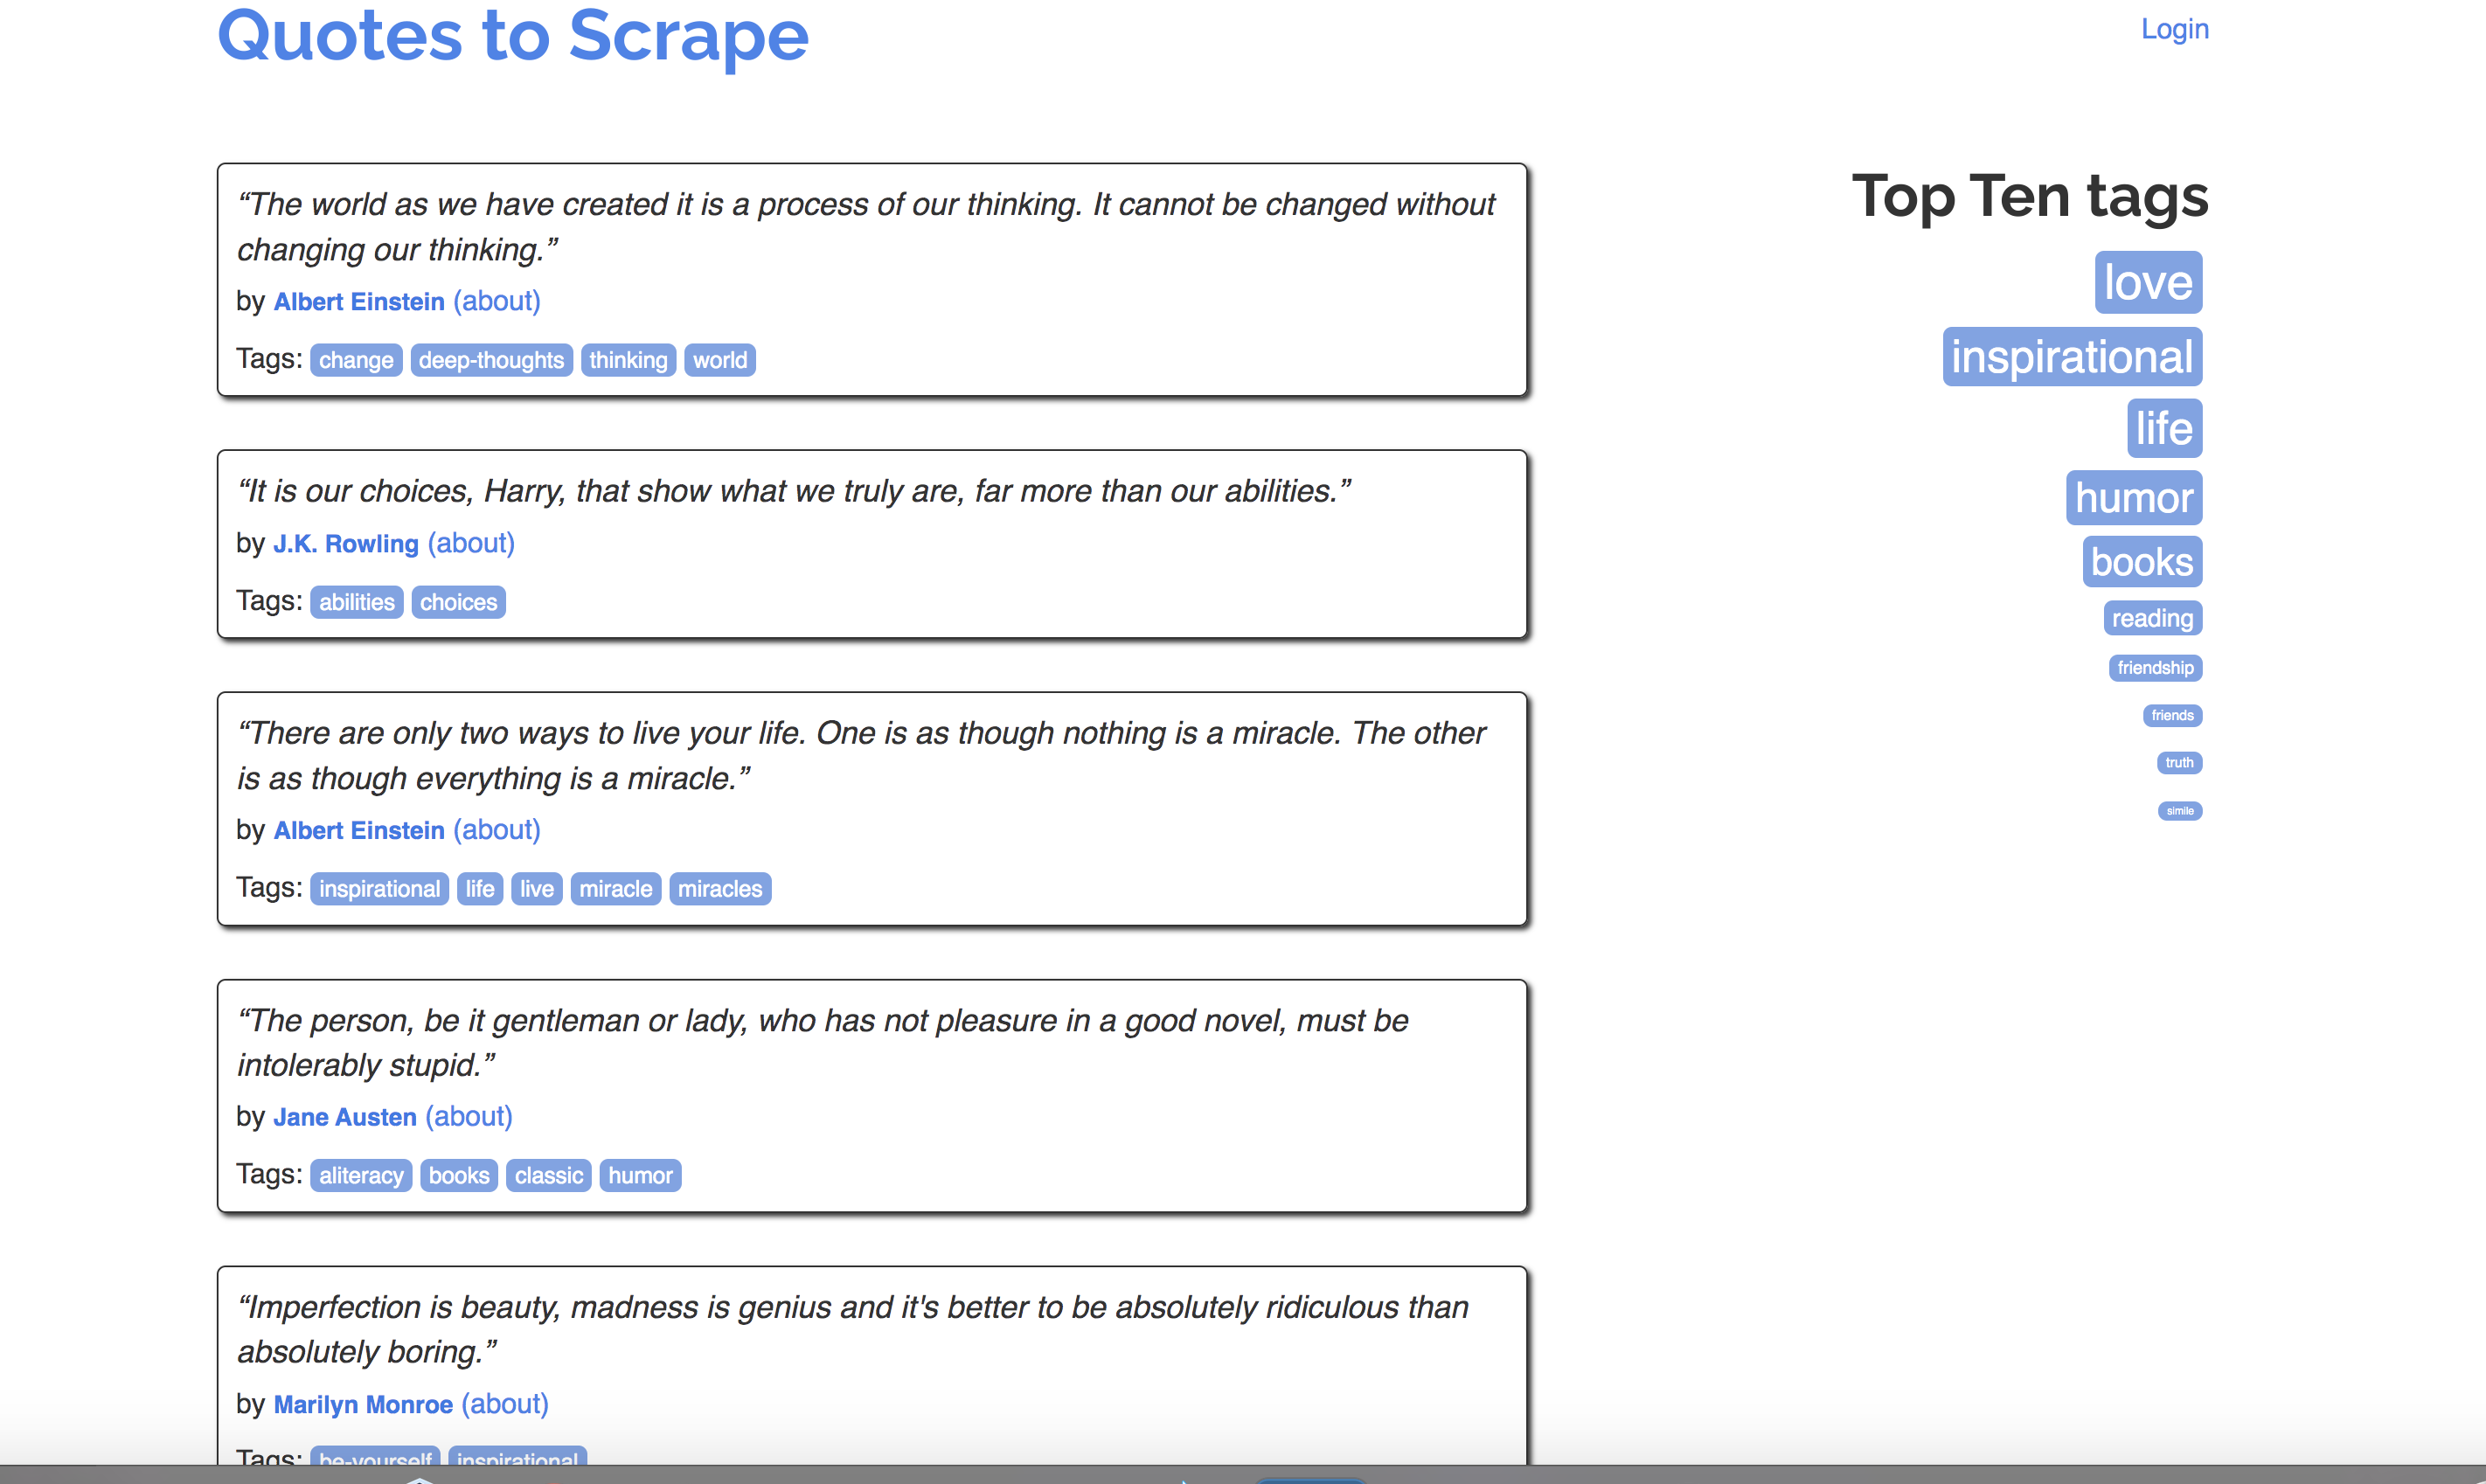

In [152]:
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")

In [153]:
quote_elements=soup.find_all("div", class_="quote")
quote_elements

[<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
 <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
 <span>by <small class="author" itemprop="author">Albert Einstein</small>
 <a href="/author/Albert-Einstein">(about)</a>
 </span>
 <div class="tags">
             Tags:
             <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
 <a class="tag" href="/tag/change/page/1/">change</a>
 <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
 <a class="tag" href="/tag/thinking/page/1/">thinking</a>
 <a class="tag" href="/tag/world/page/1/">world</a>
 </div>
 </div>,
 <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
 <span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
 <span>by <small class="author" itempr

#### Creamos un dataframe con información de la portada de la web, extraemos las frases y sus autores, creando así una tabla. El dataframe lo guardamos como archivo csv. 

In [154]:
df = pd.DataFrame()
for quote_element in quote_elements:
    quote = quote_element.find("span", class_="text")
    author = quote_element.find("small", class_="author")
    df = df.append({'Quote' : quote.text.strip(),
                        'Author' : author.text.strip()},
                    ignore_index = True)

In [155]:
df

,Quote,Author
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe
5,“Try not to become a man of success. Rather be...,Albert Einstein
6,“It is better to be hated for what you are tha...,André Gide
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt
9,"“A day without sunshine is like, you know, nig...",Steve Martin


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Quote   10 non-null     object
 1   Author  10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [157]:
df.shape

(10, 2)

In [159]:
 # Guardamos el archivo
df.to_csv('quotes_bs.csv', index = False) 

La primera página de la web cuenta con 10 frases, con las cuales armamos el DF, indicando el autor también. 

Además realizamos extracciones de otros datos :

In [15]:
#Extraemos sólo las citas 
quotes = soup.find_all('span', class_='text')
for quote in quotes:
    print(quote.text)

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
“It is our choices, Harry, that show what we truly are, far more than our abilities.”
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
“Try not to become a man of success. Rather become a man of value.”
“It is better to be hated for what you are than to be loved for what you are not.”
“I have not failed. I've just found 10,000 ways that won't work.”
“A woman is like a tea bag; you never know how strong it is until it's in hot water.”
“A day without sunshine is like, you know, night.”


In [16]:
#Extraemos sólo los autores
for author in soup.select('.author'):
    print(author.text)

Albert Einstein
J.K. Rowling
Albert Einstein
Jane Austen
Marilyn Monroe
Albert Einstein
André Gide
Thomas A. Edison
Eleanor Roosevelt
Steve Martin


In [17]:
#Extraemos las etiquetas
etiquetas = []
for cita in soup.find_all('div', class_='quote'):
    for etiqueta in cita.find_all('a', class_='tag'):
        etiquetas.append(etiqueta.text)
print(etiquetas)

['change', 'deep-thoughts', 'thinking', 'world', 'abilities', 'choices', 'inspirational', 'life', 'live', 'miracle', 'miracles', 'aliteracy', 'books', 'classic', 'humor', 'be-yourself', 'inspirational', 'adulthood', 'success', 'value', 'life', 'love', 'edison', 'failure', 'inspirational', 'paraphrased', 'misattributed-eleanor-roosevelt', 'humor', 'obvious', 'simile']


In [21]:
#Extraemos el atributo href de todos los enlaces

links = soup.find_all('a')
for link in links:
    print(link.get('href'))

/
/login
/author/Albert-Einstein
/tag/change/page/1/
/tag/deep-thoughts/page/1/
/tag/thinking/page/1/
/tag/world/page/1/
/author/J-K-Rowling
/tag/abilities/page/1/
/tag/choices/page/1/
/author/Albert-Einstein
/tag/inspirational/page/1/
/tag/life/page/1/
/tag/live/page/1/
/tag/miracle/page/1/
/tag/miracles/page/1/
/author/Jane-Austen
/tag/aliteracy/page/1/
/tag/books/page/1/
/tag/classic/page/1/
/tag/humor/page/1/
/author/Marilyn-Monroe
/tag/be-yourself/page/1/
/tag/inspirational/page/1/
/author/Albert-Einstein
/tag/adulthood/page/1/
/tag/success/page/1/
/tag/value/page/1/
/author/Andre-Gide
/tag/life/page/1/
/tag/love/page/1/
/author/Thomas-A-Edison
/tag/edison/page/1/
/tag/failure/page/1/
/tag/inspirational/page/1/
/tag/paraphrased/page/1/
/author/Eleanor-Roosevelt
/tag/misattributed-eleanor-roosevelt/page/1/
/author/Steve-Martin
/tag/humor/page/1/
/tag/obvious/page/1/
/tag/simile/page/1/
/page/2/
/tag/love/
/tag/inspirational/
/tag/life/
/tag/humor/
/tag/books/
/tag/reading/
/tag/fri

El sitio web http://quotes.toscrape.com/ tiene varias páginas, que se pueden acceder a través de los botones "Next" y "Previous, utilizamos un ciclo para recorrer cada una de ellas.

In [23]:
url = 'http://quotes.toscrape.com/page/{}'
pagina = 1
while True:
    response = requests.get(url.format(pagina))
    soup = BeautifulSoup(response.content, 'html.parser')
    citas = soup.find_all('span', class_='text')
    if len(citas) == 0:
        break
    for cita in citas:
        print(cita.text)
    pagina += 1

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
“It is our choices, Harry, that show what we truly are, far more than our abilities.”
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
“Try not to become a man of success. Rather become a man of value.”
“It is better to be hated for what you are than to be loved for what you are not.”
“I have not failed. I've just found 10,000 ways that won't work.”
“A woman is like a tea bag; you never know how strong it is until it's in hot water.”
“A day without sunshine is like, you know, night.”
“This life is what you make it. No matter what, you're going to mess up sometimes, it's a unive

In [61]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

De la web de Wikipedia seleccionamos  el contenido sobre los Bancos de España.

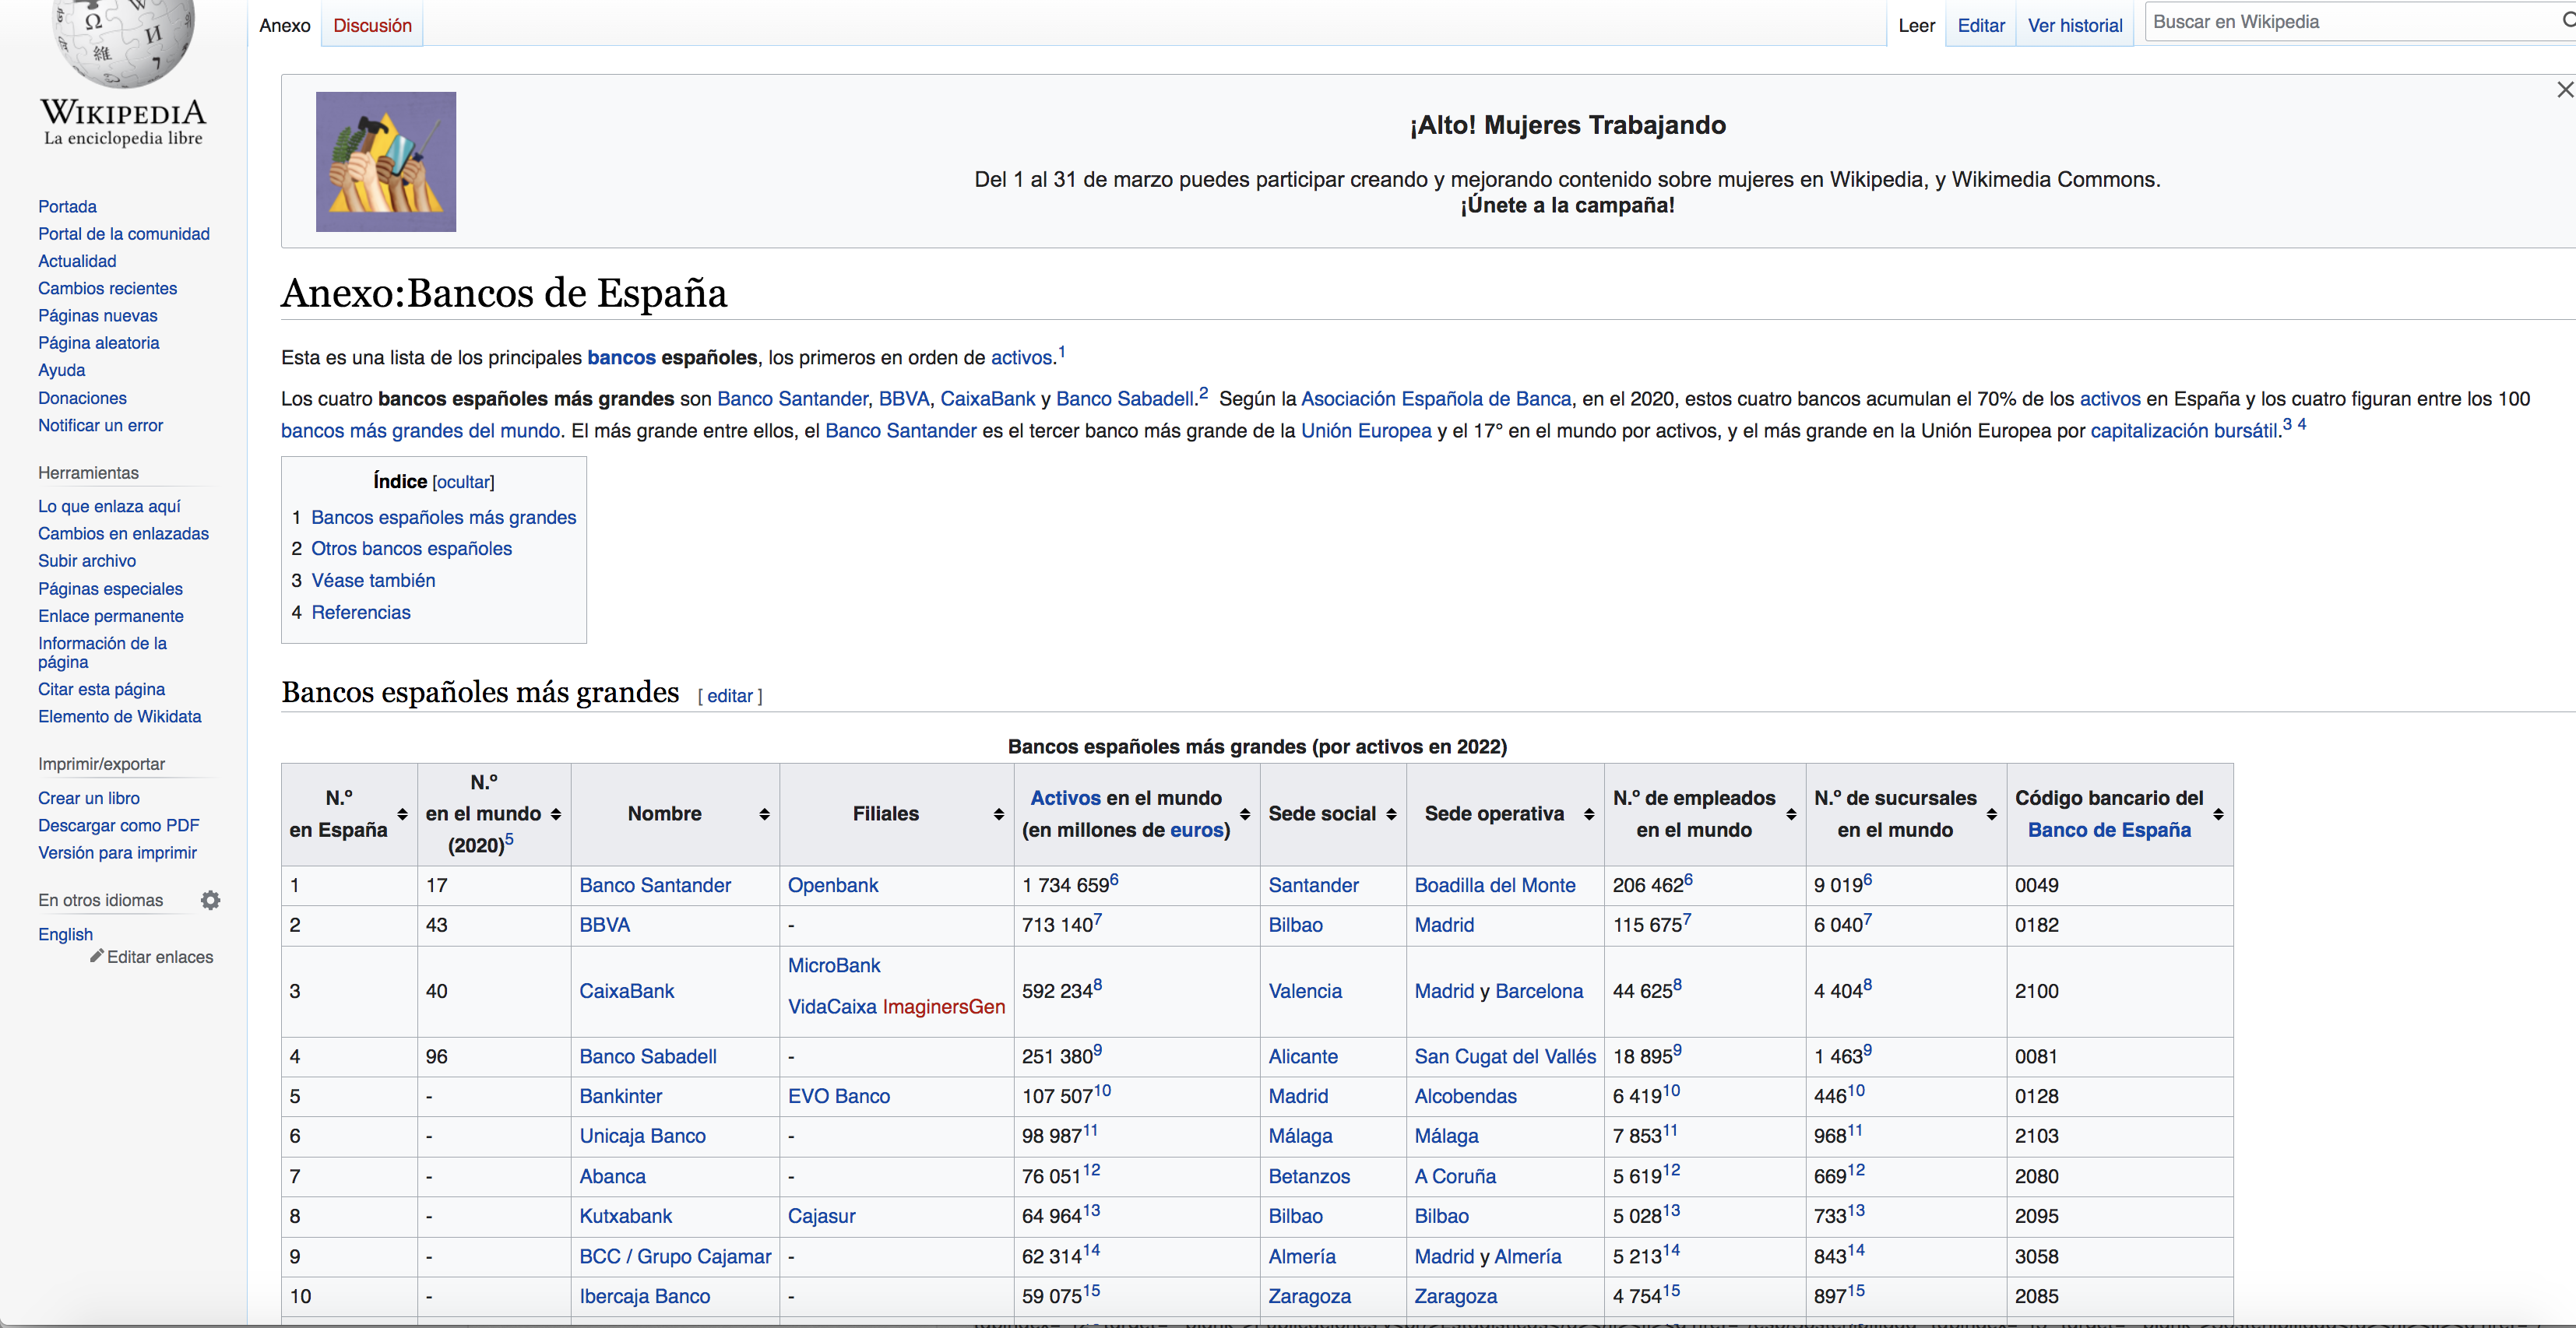

In [101]:
url2 = "https://es.wikipedia.org/wiki/Anexo:Bancos_de_Espa%C3%B1a"
response = requests.get(url2)
soup2 = BeautifulSoup(response.content, 'html.parser')

In [99]:
tabla = soup2.find_all('table', class_='wikitable')[1]
tabla

<table class="wikitable sortable">
<tbody><tr style="background: #cccccc">
<th>Nombre
</th>
<th>Sede
</th>
<th>Código del<br/><a href="/wiki/Banco_de_Espa%C3%B1a" title="Banco de España">Banco de España</a>
</th></tr>
<tr>
<td><a href="/wiki/A%26G_Banca_Privada" title="A&amp;G Banca Privada">A&amp;G Banca Privada</a>
</td>
<td><a href="/wiki/Madrid" title="Madrid">Madrid</a>
</td>
<td>0241
</td></tr>
<tr>
<td><a class="new" href="/w/index.php?title=Allfunds_Bank&amp;action=edit&amp;redlink=1" title="Allfunds Bank (aún no redactado)">Allfunds Bank</a>
</td>
<td><a href="/wiki/Madrid" title="Madrid">Madrid</a>
</td>
<td>0011
</td></tr>
<tr>
<td><a class="new" href="/w/index.php?title=Andbank_Espa%C3%B1a&amp;action=edit&amp;redlink=1" title="Andbank España (aún no redactado)">Andbank España</a>
</td>
<td><a href="/wiki/Madrid" title="Madrid">Madrid</a>
</td>
<td>1544
</td></tr>
<tr>
<td><a class="new" href="/w/index.php?title=Aresbank&amp;action=edit&amp;redlink=1" title="Aresbank (aún no

#### De la web de Wikipedia, seleccionamos el apartado que contiene información de los Bancos de España, y extraemos la segunda tabla que contiene datos bancos más pequeños.

In [100]:
data = []
for tr in tabla.find_all('tr'):
    row = [td.text.replace("\n", "") for td in tr.find_all('td')]
    if (len(row) > 0):
        data.append(row)
df2 = pd.DataFrame(data, columns=['nombre','sede','codigo'])
df2

,nombre,sede,codigo
0,A&G Banca Privada,Madrid,0241
1,Allfunds Bank,Madrid,0011
2,Andbank España,Madrid,1544
3,Aresbank,Madrid,0136
4,Arquia Bank,Madrid,3183
5,Banca Pueyo,Villanueva de la Serena,0078
6,Banco Caminos,Madrid,0234
7,Banco Cetelem,Madrid,0225
8,Banco de Depósitos,Madrid,0003
9,Banco Finantia Spain,Madrid,0220


In [161]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nombre  25 non-null     object
 1   sede    25 non-null     object
 2   codigo  25 non-null     object
dtypes: object(3)
memory usage: 728.0+ bytes


In [162]:
df2.shape

(25, 3)

In [160]:
 # Guardamos el archivo
df2.to_csv('bancosespaña_bs.csv', index = False) 

In [105]:
import requests
from bs4 import BeautifulSoup

#Portada de Wikiedia
url3 = 'https://es.wikipedia.org/wiki/Wikipedia:Portada'
response = requests.get(url)
soup3 = BeautifulSoup(response.content, 'html.parser')

In [106]:
# Encuontramos los links
links_w = soup3.find_all('a')
print(links_w)

[<a id="top"></a>, <a class="mw-jump-link" href="#mw-head">Ir a la navegación</a>, <a class="mw-jump-link" href="#searchInput">Ir a la búsqueda</a>, <a href="/wiki/Wikipedia:Bienvenidos" title="Wikipedia:Bienvenidos">Bienvenidos</a>, <a href="/wiki/Ayuda:Introducci%C3%B3n" title="Ayuda:Introducción">todos pueden editar</a>, <a href="/wiki/Especial:Buscar" title="Especial:Buscar"><span class="mw-ui-button main-top-mobileSearchButton skin-minerva-search-trigger">Buscar en 1 846 497 artículos</span></a>, <a href="/wiki/Especial:Estad%C3%ADsticas" title="Especial:Estadísticas">1 846 497</a>, <a href="/wiki/Wikipedia_en_espa%C3%B1ol" title="Wikipedia en español">en español</a>, <a href="/wiki/Wikipedia:Caf%C3%A9" title="Wikipedia:Café"><span class="mw-ui-button mw-ui-quiet">Café</span></a>, <a href="/wiki/Ayuda:C%C3%B3mo_puedes_colaborar" title="Ayuda:Cómo puedes colaborar"><span class="mw-ui-button mw-ui-quiet">¿Cómo colaborar?</span></a>, <a href="/wiki/Ayuda:Introducci%C3%B3n" title="Ayu

In [107]:
# Etiquetas h1
h1_w = soup3.find('h1')
print(h1_w)

<h1 class="firstHeading mw-first-heading" id="firstHeading"><span class="mw-page-title-namespace">Wikipedia</span><span class="mw-page-title-separator">:</span><span class="mw-page-title-main">Portada</span></h1>


In [109]:
#Extraemos el texto de la primera etiqueta h1.
print(h1_w.text)

Wikipedia:Portada


#### SELENIUM

In [125]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
import time
from selenium.webdriver.chrome.options import Options
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [126]:
# This is not needed if chromedriver is already on your path:
chromedriver_path = "/Users/natalia/Downloads/chromedriver_mac64/chromedriver"

options = Options()
options.add_argument("--window-size=1920x1080")
options.add_argument("--verbose")
# options.add_argument("--headless")

driver = webdriver.Chrome(options=options, executable_path=chromedriver_path)
driver.get("https://quotes.toscrape.com")

In [127]:
#La primera frase de la web
frases = driver.find_element("xpath","//span[@class='text']")
print(frases.text)

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”


In [119]:
authors = driver.find_elements("xpath","//small[@class='author']")
for val in authors:
    print(val.text)

Albert Einstein
J.K. Rowling
Albert Einstein
Jane Austen
Marilyn Monroe
Albert Einstein
André Gide
Thomas A. Edison
Eleanor Roosevelt
Steve Martin


In [146]:
driver = webdriver.Chrome()
driver.get("https://quotes.toscrape.com")

authors = driver.find_elements("xpath","//small[@class='author']")

data_q = []
for val in authors:
    data_q.append(val.text)

df_q = pd.DataFrame(data_q, columns=['authors'])
print(df_q)



             authors
0    Albert Einstein
1       J.K. Rowling
2    Albert Einstein
3        Jane Austen
4     Marilyn Monroe
5    Albert Einstein
6         André Gide
7   Thomas A. Edison
8  Eleanor Roosevelt
9       Steve Martin


In [120]:
print(driver.title)

Quotes to Scrape


In [129]:
# Accedemos al sitio web Wikipedia
driver.get("https://es.wikipedia.org/wiki/P%C3%A1gina_principal")


In [130]:
html = driver.page_source

In [132]:
soup = BeautifulSoup(html, "html.parser")

# Extracción de título de la página
title = soup.find("title").text
title

'Wikipedia, la enciclopedia libre'

In [134]:
data_w = {"Título": [title]}
df_w = pd.DataFrame(data_w)
df_w.to_csv("wikipedia.csv", index=False)
df_w

,Título
0,"Wikipedia, la enciclopedia libre"


### <span style='color:Blue'> Exercici 2 </span>
Documenta en un Word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle.

### Dataset : df 

#### Acerca del dataset

##### Contexto

Este dataset ha sido creado a través de aplicar web scraping con Beatifulsoup en la URL:"http://quotes.toscrape.com".


Sólo contiene información sobre contenida en la portada de la web. 
Diez frases y sus autores.
##### Contenido
10 filas y 2 columnas.
Descripción de las columnas:

+ Quote: frase.
+ Author: nombre del autor de la frase.
El archivo del dataset se puede descargar en quotes_bs.csv.

### Dataset : df2

#### Acerca del dataset

##### Contexto

Este dataset ha sido creado a través de aplicar web scraping con Beatifulsoup en la URL:"https://es.wikipedia.org/wiki/Anexo:Bancos_de_Espa%C3%B1a".


Contiene información sobre Bancos de España.
##### Contenido
25  filas y 3 columnas.
Descripción de las columnas:

+ Nombre: Nombre del Banco 
+ Sede:lugar donde se encuentra la sede del banco.
+ Código: número de identificación del banco.
El archivo del dataset se puede descargar en bancosespaña_bs.csv.

### <span style='color:Blue'> Exercici 3 </span>
Tria una pàgina web que tu vulguis i realitza web scraping mitjançant la llibreria Selenium primer i Scrapy després. 

In [164]:
url3="https://cocinerosargentinos.com/recetas"

In [172]:
from selenium import webdriver

# Inicializamos el webdriver
driver = webdriver.Chrome()
driver.get("https://cocinerosargentinos.com/recetas")

# Encuentra todos los elementos (Categorias de recetas)
elements = driver.find_elements(By.XPATH, "//div[@class='side-nav-categories']")

# Imprimimos los elementos
for element in elements:
    print(element.text)

# Cerramos el navegador
driver.quit()



CATEGORÍAS
APTO CELÍACO
BEBIDAS
VEGETARIANO
SALUDABLES
POSTRES
PIZZAS
PESCADOS Y MARISCOS
PASTELERÍA
PANES
ARROCES Y PASTAS
MASAS SALADAS
INTERNACIONALES
HELADOS
HAMBURGUESAS
GUISOS Y SOPAS
FRITURAS
FIESTAS
ENSALADAS
ECONÓMICAS
CARNE
POLLO
